In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.integrate import quad
from scipy.interpolate import interp1d
import seaborn as sns
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.ticker as ticker
from scipy import constants as sc
from scipy import signal
import HERA_hack_FG
import HERA_FG_PS
import HERA_beam
import FG_pygsm

%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [277]:
dishes = np.array([[0,0],[150,75],[0,150],[0,-57.39295490174667],[30,0],[0,60],[2,55],[47,2],[45,23],[56,21],[30,115],[48,52],[100,100],[0,200],[115,30],[33,31],[49,11],[21,24],[25,6],[56,9],[12,13],[16,17],[38,17],[60,14],[26,28],[6,45],[3,37],[12,55],[200,0],[145,13],[134,65],[139,163]])


npix_row,npix_col = 41,41

pbeam =True 
norm = True 


acorner = np.array([[119,274],[121,276],[119,276],[121,274]])

HERA = HERA_hack_FG.telescope(dishes, latitude=-30, channel_width=97800, beam_width=0.9, beam = 'gaussian')

obs = HERA_hack_FG.observation(telescope = HERA, n_days = 3, freq = 182.54400000000044, delta_t = 0.002 ,corners = acorner, beam_sigma_cutoff=1, sky_shape = (npix_row,npix_col), norm = norm , pbeam = pbeam)


In [278]:
obs.observable_coordinates()

array([[2.07694181, 4.78220215],
       [2.07781447, 4.78220215],
       [2.07868714, 4.78220215],
       ...,
       [2.11010307, 4.81710874],
       [2.11097573, 4.81710874],
       [2.11184839, 4.81710874]])

In [279]:
#min and max phi
min(obs.position[:,1]),max(obs.position[:,1])

(4.782202150464463, 4.817108735504349)

In [280]:
# min and max theta
min(obs.position[:,0])-max(obs.position[:,0])

-0.03490658503988664

In [281]:
2/41

0.04878048780487805

In [282]:
beam_area = (7.6e-6)*u.sr
freq = 150*u.MHz
equiv = u.brightness_temperature(freq)
(2.5*u.Jy/beam_area).to(u.K, equivalencies=equiv) 

NameError: name 'u' is not defined

In [283]:
# 3 deg = 0.0523599
# want to assign

psource_pos = np.array([[2.09,min(obs.position[:,1])-0.02],[2.110,max(obs.position[:,1])+0.03],[min(obs.position[:,0])-0.044,4.79]])
psource_flux = np.array([1e5,3e5,9e5])#K
psource_flux.shape , sky.shape


((3,), (1681,))

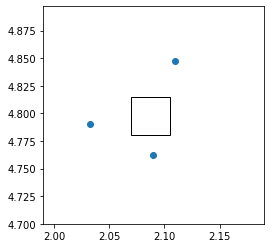

In [284]:

# Get the current reference


fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal')

ax2.add_patch(patches.Rectangle((2.07,4.78), 0.034906, 0.034906,fill=False  ) )
ax2.set_xlim(2.07-0.08,2.11+0.08)
ax2.set_ylim(4.78-0.08,4.817+0.08)
ax2.scatter(psource_pos[:,0],psource_pos[:,1])




In [285]:
sky = signal.unit_impulse(npix_row*npix_col, 'mid') #delta funtion point source in the middle
obs.convolve_map(sky,None,None)

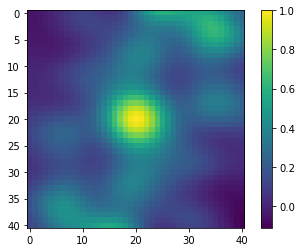

In [286]:
plt.imshow(np.real(obs.map).reshape(41,41).T)
plt.colorbar()

In [261]:
mpi_obs = np.loadtxt("obs_sky_Hnoise_fg_624.txt").reshape(50*50,140)

OSError: obs_sky_Hnoise_fg_624.txt not found.

In [ ]:
plt.imshow(mpi_obs[:,33].reshape(50,50))
plt.colorbar()

In [262]:
total_pos = np.hstack((sky,psource_flux))
total_pos.shape

(1684,)

In [263]:
total_pos.shape , obs.position.shape

((1684,), (1681, 2))

In [272]:
HERA_b = HERA_beam.telescope(dishes, latitude=-30, channel_width=97800, beam_width=1, beam = 'gaussian')
obs_b = HERA_beam.observation(telescope = HERA, n_days = 3, freq = 182.54400000000044, delta_t = 0.002 ,corners = acorner, beam_sigma_cutoff=1, sky_shape = (npix_row,npix_col), norm = norm , pbeam = pbeam)


obs_b.observable_coordinates()


array([[2.07694181, 4.78220215],
       [2.07781447, 4.78220215],
       [2.07868714, 4.78220215],
       ...,
       [2.09      , 4.76220215],
       [2.11      , 4.84710874],
       [2.03294181, 4.79      ]])

In [274]:
obs_b.convolve_map(sky,None,None)
obs_b.Nt

1

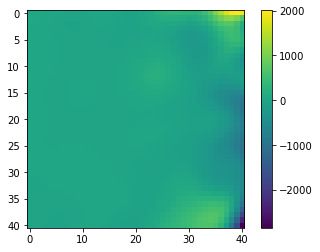

In [276]:
plt.imshow(np.real(obs_b.map[:obs_b.Npix-3]).reshape(41,41).T)
plt.colorbar()

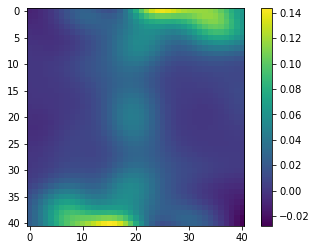

In [267]:
plt.imshow(np.real((obs_b.map-obs.map)).reshape(41,41).T)
plt.colorbar()

In [36]:
obs_PS.observable_coordinates()
obs_PS.necessary_times()
fg_21cm = FG_pygsm.foregrounds(obs,150)
diffuse_fg = fg_21cm.diffuse_fg(100,True)


In [38]:
len(diffuse_fg), 41*41

(1681, 1681)